In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')
import matplotlib as mpl
import matplotlib.patches as patches
mpl.rcParams['axes.linewidth'] = 2

In [2]:
!pip install lsdb

In [3]:
import lsdb
from lsdb.core.search import BoxSearch, ConeSearch, PolygonSearch

from hipscat.inspection import plot_pixels

'Version of lsdb is %s' % lsdb.__version__

'Version of lsdb is 0.2.1'

In [4]:
# Gaia
gaia_path = "https://epyc.astro.washington.edu/~lincc-frameworks/hipscat_surveys/gaia_dr3/gaia"

# ZTF
ztf_object_path = "https://epyc.astro.washington.edu/~lincc-frameworks/hipscat_surveys/ztf/ztf_dr14/"
ztf_source_path = "https://epyc.astro.washington.edu/~lincc-frameworks/hipscat_surveys/ztf/ztf_source/"

In [5]:
%%time
# load lite version of Gaia DR3 for quick cone searches
gaia_lite = lsdb.read_hipscat(gaia_path, columns=["ra", "dec"], search_filter=ConeSearch(ra=-60, dec=20, radius_arcsec=1*3600))
#Load ZTF, Gaia, and ZTF sources hipscats # note data3/ for epyc
gaia = lsdb.read_hipscat(gaia_path, columns=["ra", "dec"])

CPU times: user 431 ms, sys: 12.7 ms, total: 444 ms
Wall time: 5.12 s


In [6]:
%%time
ztf_object = lsdb.read_hipscat(ztf_object_path, columns=["ra", "dec"]) # ZTF Object
ztf_source = lsdb.read_hipscat(ztf_source_path, columns=["ra", "dec"]) # ZTF Source

CPU times: user 7.74 s, sys: 360 ms, total: 8.1 s
Wall time: 12.1 s


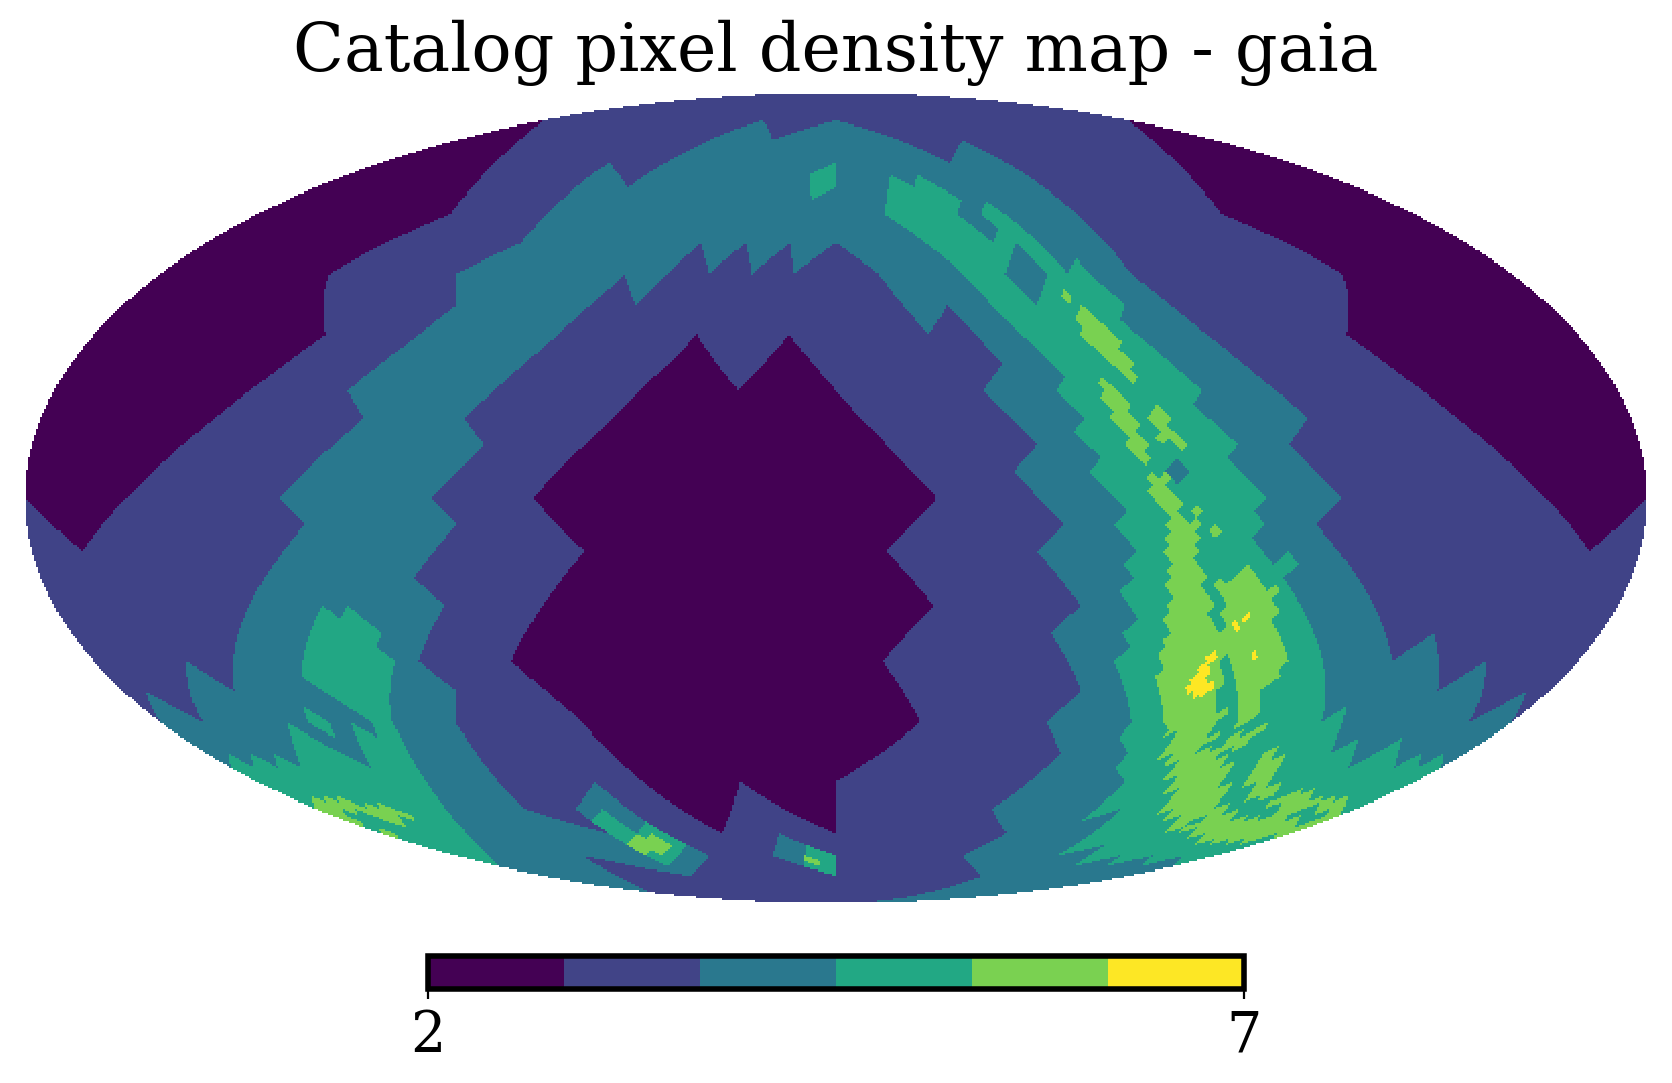

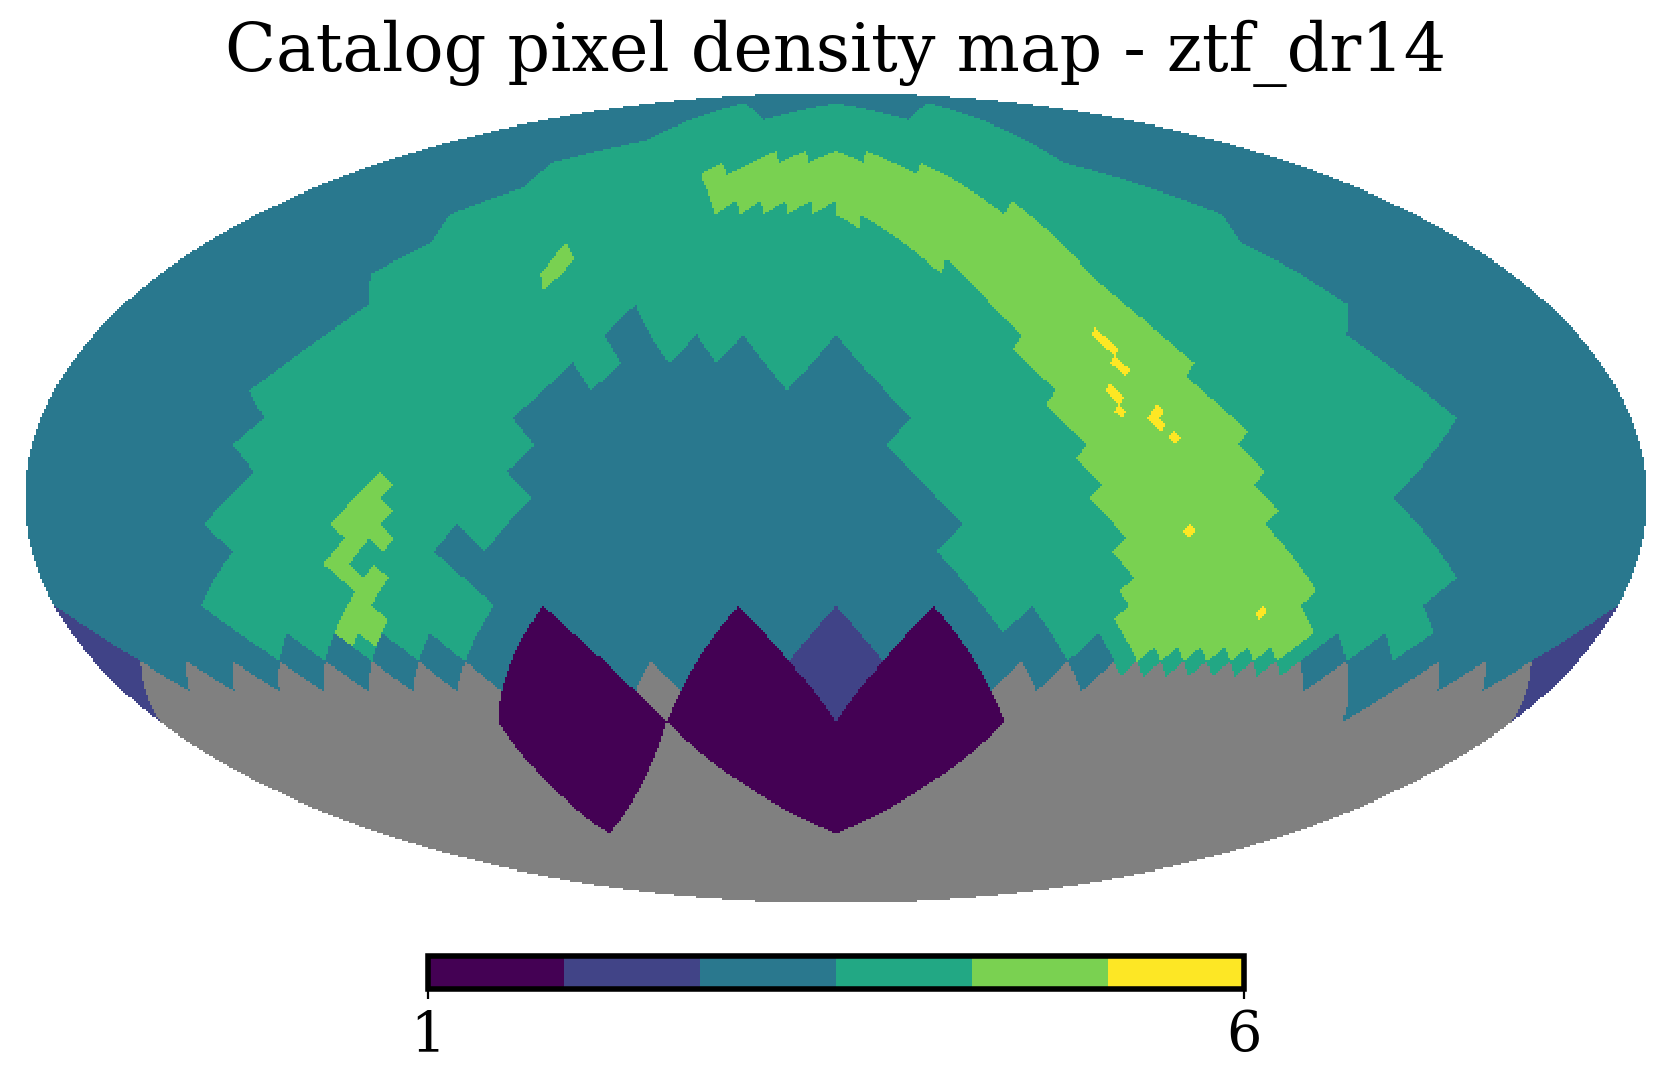

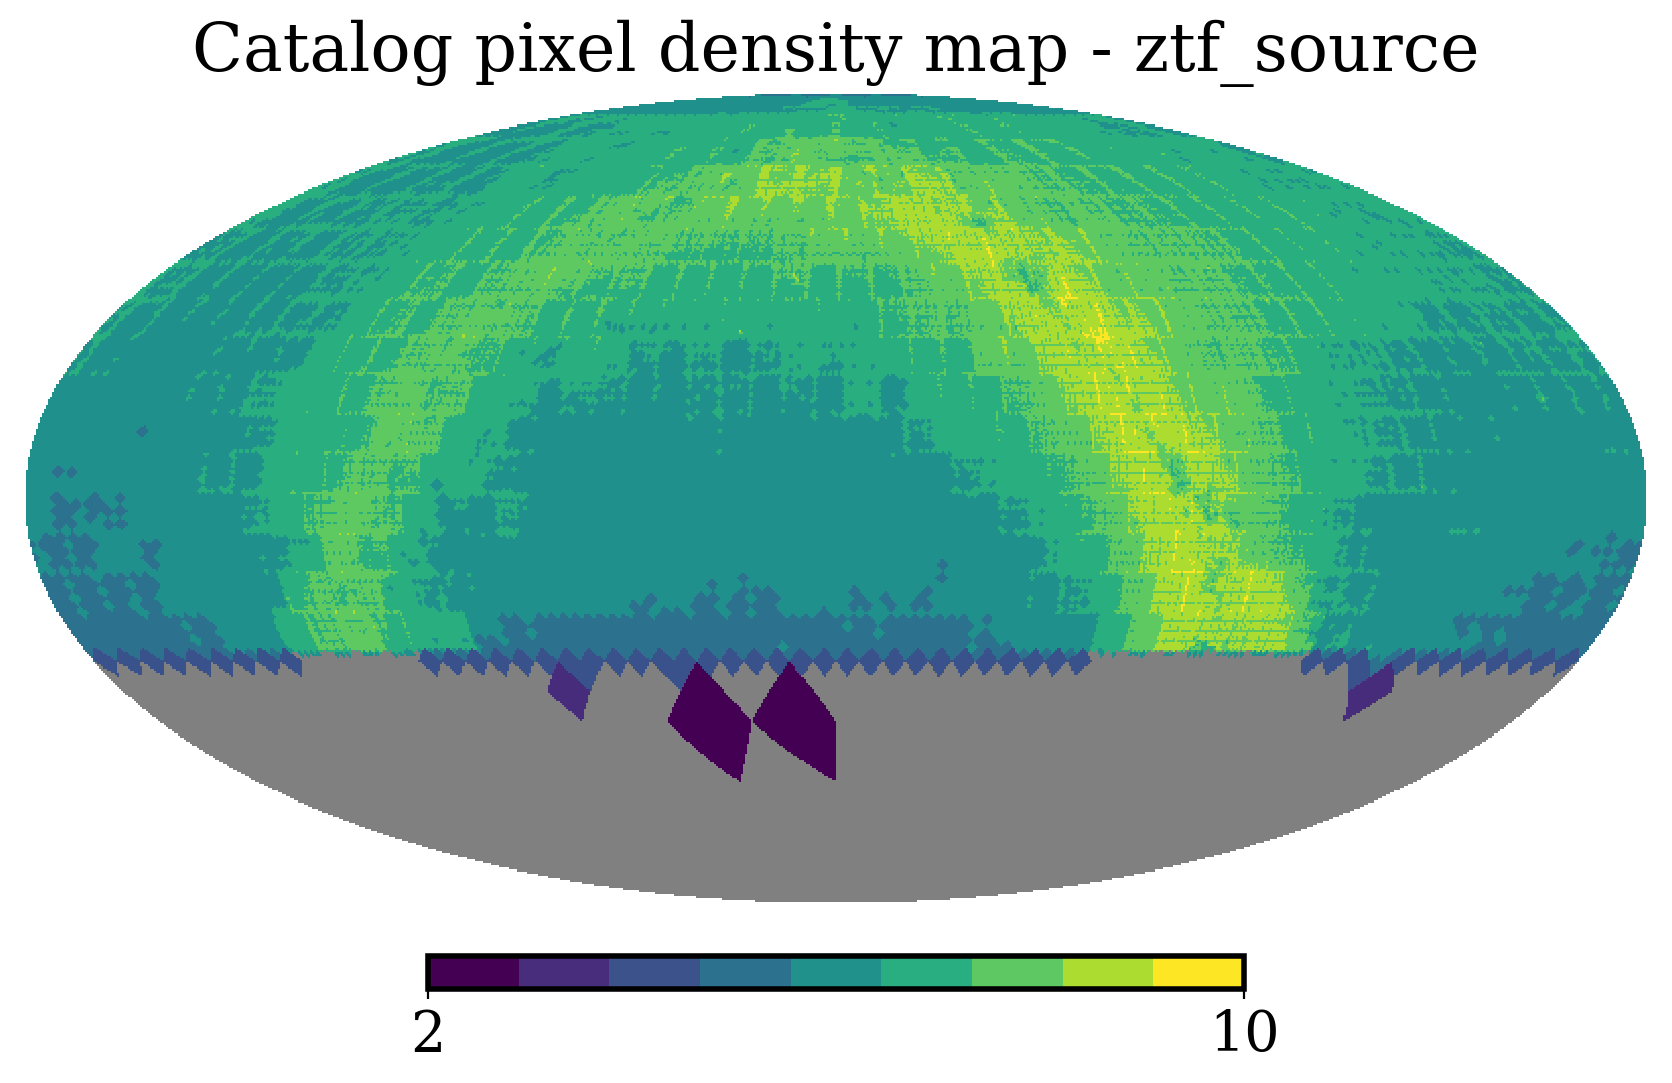

In [7]:
# Plot the Pixel Density Maps for Gaia and ZTF


plot_pixels(gaia.hc_structure)
plot_pixels(ztf_object.hc_structure)
plot_pixels(ztf_source.hc_structure)

In [8]:
# Cross-match Gaia and ZTF
%time 
xmatch_object = gaia_lite.crossmatch(ztf_object, require_right_margin = False)

xmatch_object.head(5)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


/opt/conda/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:117: RuntimeWarning: Right catalog does not have a margin cache. Results may be inaccurate
  warnings.warn("Right catalog does not have a margin cache. Results may be inaccurate", RuntimeWarning)


,ra_gaia,dec_gaia,ra_ztf_dr14,dec_ztf_dr14,_dist_arcsec
_hipscat_index,,,,,
3643412099679387648,300.938807,16.959530,300.938812,16.959557,0.096993
3643412100069457920,300.939196,16.960282,300.939191,16.960302,0.076818
3643412100413390848,300.938070,16.960664,300.938068,16.960826,0.584654
3643412102065946624,300.938019,16.961057,300.938068,16.960826,0.846288
3643412107736645632,300.934457,16.961220,300.934442,16.961234,0.069840


In [9]:
# load the margins?

In [10]:
# Reading HiPSCat's from an 'almanac' ?

In [11]:
%%time
# load with all columns here
gaia_lite = lsdb.read_hipscat(gaia_path, search_filter=ConeSearch(ra=-60, dec=20, radius_arcsec=1*3600))
ztf_object = lsdb.read_hipscat(ztf_object_path) # ZTF Object

CPU times: user 395 ms, sys: 9.97 ms, total: 405 ms
Wall time: 4.57 s


In [12]:
%%time
# crossmatch ZTF + Gaia
# names here are dr14, need to be moved to 22
_all_sky_object = gaia_lite.crossmatch(ztf_object, require_right_margin = False).query(
    "nobs_g_ztf_dr14 > 50 and nobs_r_ztf_dr14 > 50 and \
    parallax_gaia > 0 and parallax_over_error_gaia > 5 and \
    teff_gspphot_gaia > 5380 and teff_gspphot_gaia < 7220 and logg_gspphot_gaia > 4.5 \
    and logg_gspphot_gaia < 4.72 and classprob_dsc_combmod_star_gaia > 0.5")

CPU times: user 87.8 ms, sys: 259 µs, total: 88.1 ms
Wall time: 87.2 ms


/opt/conda/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:117: RuntimeWarning: Right catalog does not have a margin cache. Results may be inaccurate
  warnings.warn("Right catalog does not have a margin cache. Results may be inaccurate", RuntimeWarning)


In [13]:
%%time 
total = _all_sky_object.compute()

CPU times: user 29.9 s, sys: 22.9 s, total: 52.7 s
Wall time: 32.5 s


In [14]:
total.head(5)

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_dist_arcsec
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
3643413275007254528,1636148068921376768,Gaia DR3 1821706637701187200,1821706637701187200,372376383,2016.0,300.994010,0.031234,17.012684,0.024773,0.608951,...,56,98,0,16.662648,16.020428,NaN,5,0,3236,0.083317
3643414806045655040,1636148068921376768,Gaia DR3 1821707393615573888,1821707393615573888,270237472,2016.0,300.918962,0.032737,17.045524,0.027808,0.390358,...,56,98,0,16.828846,16.213753,NaN,5,0,3236,0.080489
3643415430317473792,1636148068921376768,Gaia DR3 1821707698546214272,1821707698546214272,864928606,2016.0,300.941856,0.052227,17.048924,0.044048,1.167348,...,55,98,0,17.669216,16.670712,NaN,5,0,3236,0.146554
3643416488817197056,1636148068921376768,Gaia DR3 1821708213935407488,1821708213935407488,1598760376,2016.0,300.934786,0.033041,17.107908,0.031840,0.514579,...,55,98,0,17.153486,16.486329,NaN,5,0,3236,0.064002
3643416611496394752,1636148068921376768,Gaia DR3 1821708286968620672,1821708286968620672,1668236203,2016.0,301.028256,0.038429,17.055523,0.036194,0.372974,...,56,98,0,17.366521,16.772852,NaN,5,0,3236,0.101270


Text(0, 0.5, 'dec [deg]')

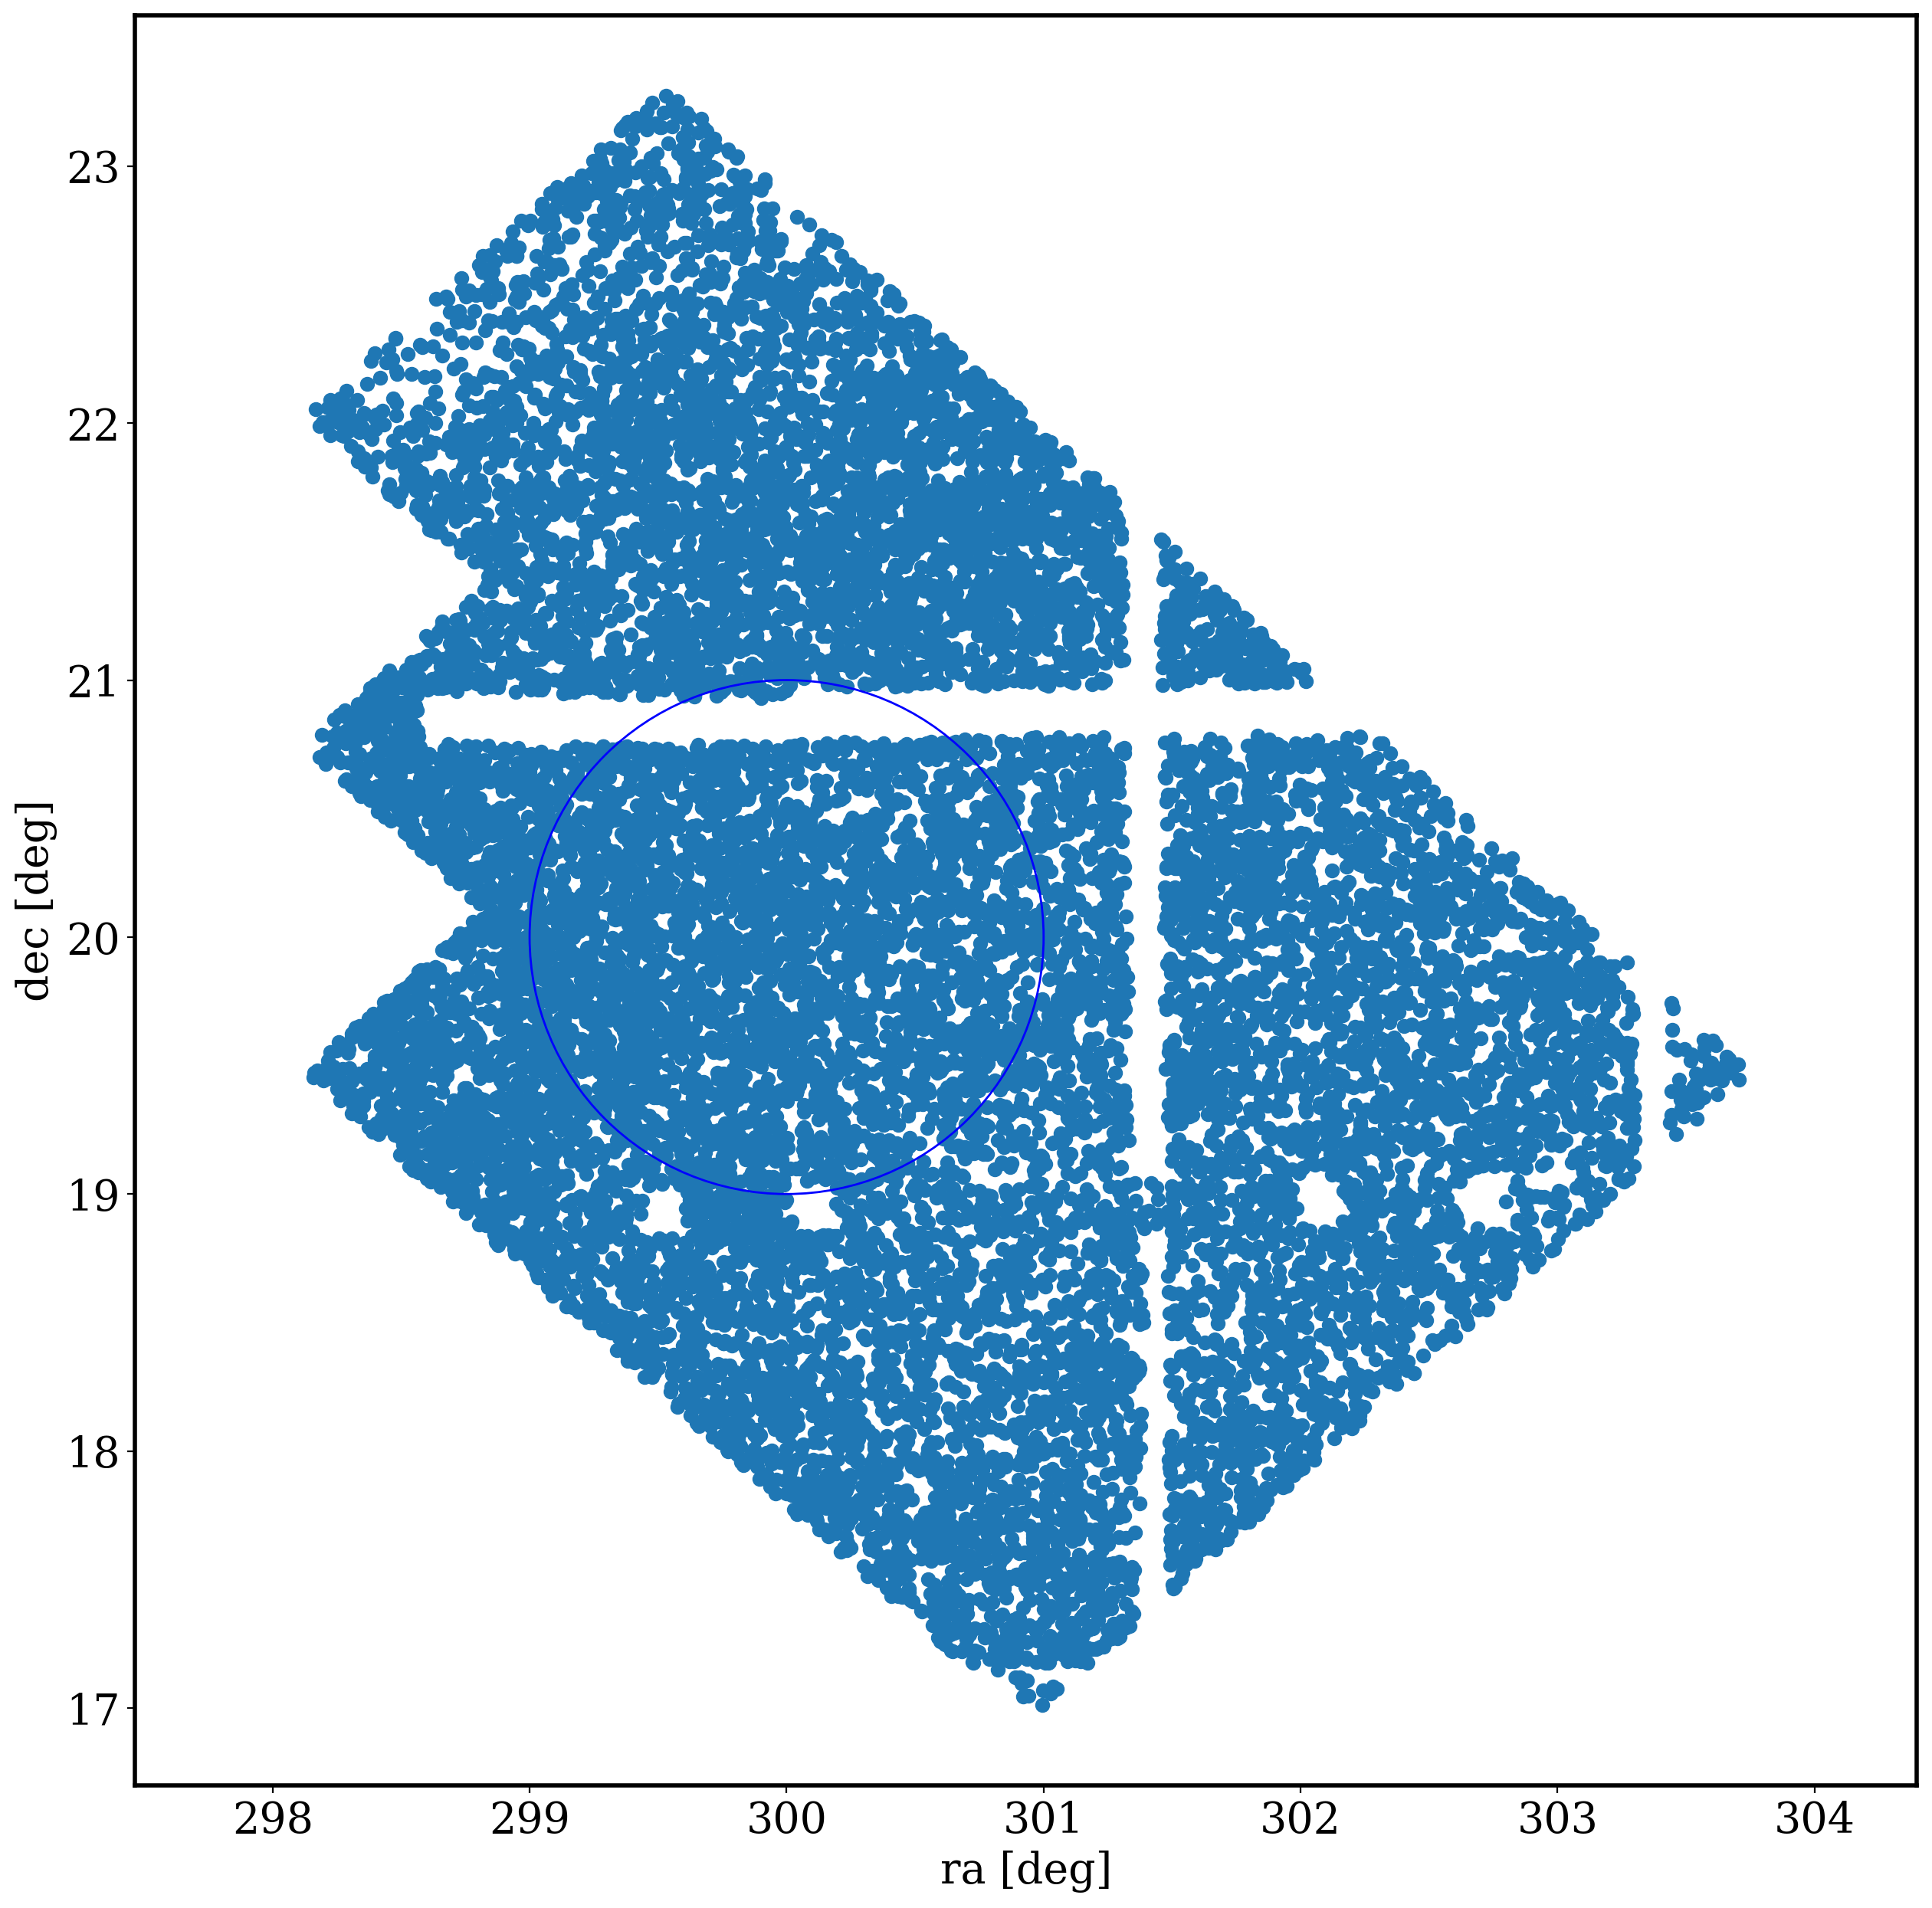

In [25]:
plt.figure(figsize=(15,15))
plt.scatter(total['ra_gaia'].values, total['dec_gaia'].values)
# Create a circle patch
circle = patches.Circle((300, 20), 1, edgecolor='blue', facecolor='lightblue', fill=False)
plt.axis('equal')
# Use plt.gca() to get the current axes and add the circle to it
plt.gca().add_patch(circle)
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')

In [16]:
 total['ra_gaia'].values

array([300.99400996, 300.91896209, 300.94185601, ..., 299.57544285,
       299.47635248, 299.529857  ])